In [1]:
from sklearn.datasets import make_regression
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import r2_score
import pandas as pd

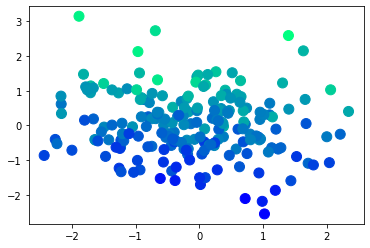

In [2]:
X,y = make_regression(n_samples=200,n_features=2,noise=40)
plt.scatter(X[:,0],X[:,-1],c = y,cmap='winter',s=100)


In [3]:
X,y = make_regression(n_samples=200,n_features=2,noise=40)

In [4]:
data = pd.DataFrame({'feature':X[:,0], 'feature2':X[:,-1],'target':y})

In [5]:
data.shape

(200, 3)

In [6]:
data.head()

,feature,feature2,target
0,-0.682801,0.020839,-70.438324
1,-0.020284,1.391170,4.129039
2,-0.529089,-0.399011,-85.478783
3,-0.161146,0.892038,17.265243
4,-0.339309,0.419665,19.281016


In [7]:
px.scatter_3d(data,x='feature',y='feature2',z='target')

In [8]:
X_test,X_train,y_test,y_train = tts(X,y,train_size=0.2)

In [9]:
class Multi_Regression:
    def __init__(self):
        self.m = None
        self.b = None
    
    def fit(self,X_train,y_train):
        X_train = np.insert(X_train,0,1,axis=1)
        bais = np.linalg.inv(np.dot(X_train.T,X_train)).dot(X_train.T).dot(y_train)
        self.b = bais[0]
        self.m = bais[1:]
        
    
    def predict(self,X_test):
        y_pred = np.dot(X_test,self.m) + self.b
        return y_pred


In [10]:
mul_reg = Multi_Regression()
mul_reg.fit(X_train,y_train)
y_pred = mul_reg.predict(X_test)

In [11]:
r2_score(y_test,y_pred)

0.795804969387157

<h1> Data Sets</h1>

In [12]:
data = pd.read_csv('Salary.csv')

In [13]:
data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [15]:
X = data['YearsExperience'].values
Y = data['Salary'].values

In [16]:
X = X.reshape(-1,1)

In [18]:
X_test,X_train,y_test,y_train = tts(X,Y,train_size=0.2)

In [19]:
mul_reg.fit(X_train,y_train)

In [21]:
y_pred = mul_reg.predict(X_test)

In [22]:
r2_score(y_test,y_pred)

0.9650842170883875

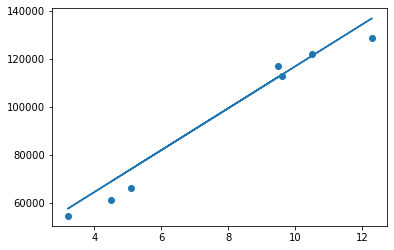

In [24]:
plt.scatter(X_test,y_test)
plt.plot(X_test,y_pred)